In [1]:
"""
Principal Component Analysis applied to the Iris dataset.
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score

from sklearn import decomposition
from sklearn import datasets
%matplotlib inline

/Users/georgemcintire/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/georgemcintire/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Load in the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

In [4]:
target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

In [ ]:
# Julia, Stanley, Deepa

In [5]:
# KNN with the original iris
knn = KNeighborsClassifier(n_neighbors=5)
cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()

0.96666666666666679

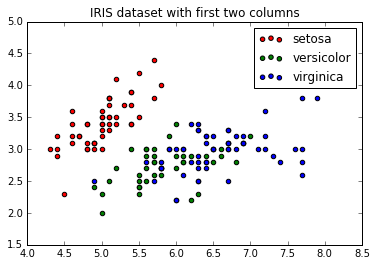

In [6]:
plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('IRIS dataset with first two columns')

In [5]:
#############################
### PCA with 2 components  ##
#############################

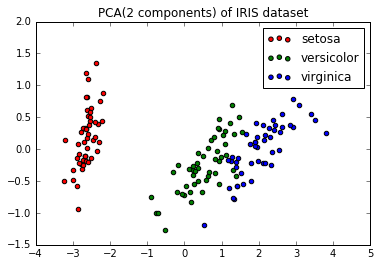

In [7]:
pca = decomposition.PCA(n_components=2)
X_r = pca.fit_transform(X)

plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('PCA(2 components) of IRIS dataset')

Note the axis are not the same anymore! They are no longer anything such as "sepal length" or "petal width"

In [8]:
X_r[:5,]
# only 2 columns!!

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456]])

In [9]:
# KNN with PCAed data
knn = KNeighborsClassifier(n_neighbors=5)
cross_val_score(knn, X_r, y, cv=10, scoring='accuracy').mean()

0.96000000000000019

In [10]:
X_reconstituted = pca.inverse_transform(X_r)
# Turn it back into its 4 column using only 2 principal components

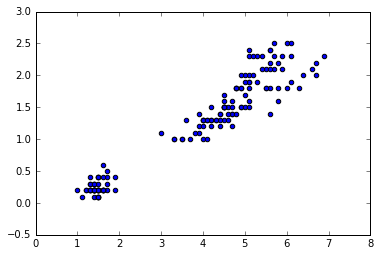

In [11]:
plt.scatter(X[:,2], X[:,3])
# Original Data

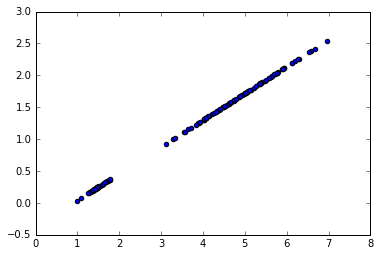

In [12]:
plt.scatter(X_reconstituted[:,2], X_reconstituted[:,3])
# it is only looking at 2 dimensions of data!

In [13]:
#############################
### PCA with 3 components  ##
#############################

pca = decomposition.PCA(n_components=3)
pca.fit(X)
X_3 = pca.transform(X)

X_3[:5,]

array([[-2.68420713,  0.32660731, -0.02151184],
       [-2.71539062, -0.16955685, -0.20352143],
       [-2.88981954, -0.13734561,  0.02470924],
       [-2.7464372 , -0.31112432,  0.03767198],
       [-2.72859298,  0.33392456,  0.0962297 ]])

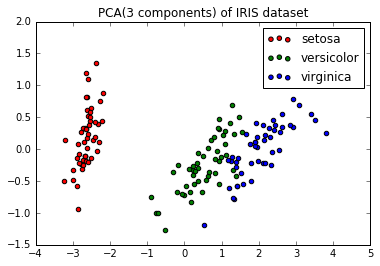

In [14]:
plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_3[y == i, 0], X_3[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('PCA(3 components) of IRIS dataset')

In [15]:
# KNN with 3 components
knn = KNeighborsClassifier(n_neighbors=5)
cross_val_score(knn, X_3, y, cv=10, scoring='accuracy').mean()

0.96666666666666679

In [16]:
X_reconstituted = pca.inverse_transform(X_3)

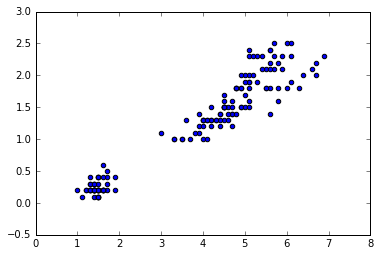

In [17]:
plt.scatter(X[:,2], X[:,3])
# Original Data

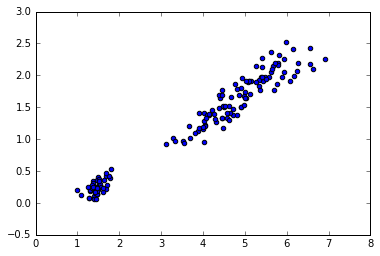

In [18]:
plt.scatter(X_reconstituted[:,2], X_reconstituted[:,3])

In [19]:
#############################
### choosing components  ####
#############################


pca = decomposition.PCA(n_components=4)
X_r = pca.fit_transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [ 0.92461621  0.05301557  0.01718514  0.00518309]


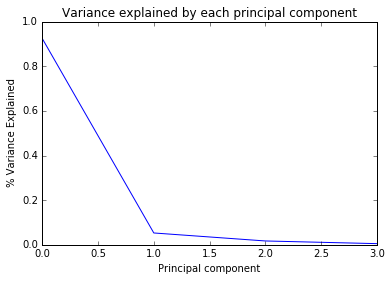

In [20]:
plt.plot(pca.explained_variance_ratio_)
plt.title('Variance explained by each principal component')
plt.ylabel(' % Variance Explained')
plt.xlabel('Principal component')

# 2 components is enough!!

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

/Users/georgemcintire/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [22]:

url = '../data/yelp.csv'
yelp = pd.read_csv(url, encoding='unicode-escape')

# create a new DataFrame that only contains the 5-star and 1-star reviews
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

# define X and y
X = yelp_best_worst.text
y = yelp_best_worst.stars == 5

In [23]:
y.value_counts()

True     3337
False     749
Name: stars, dtype: int64

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [25]:
from sklearn.pipeline import Pipeline

In [26]:
# removing no features and using sklearn pipelines

# Ask yourself, Why are we using pipelines here?


vect = CountVectorizer(stop_words='english')

pipe = Pipeline(steps=[('transform', vect), ('lr', lr)])
cross_val_score(pipe, X, y, cv=10, scoring='accuracy').mean()

0.93245414867556398

In [27]:
vect = CountVectorizer(stop_words='english', max_features = 1000)
pipe = Pipeline(steps=[('transform', vect), ('lr', lr)])
cross_val_score(pipe, X, y, cv=10, scoring='accuracy').mean()

0.92559557190651665

In [28]:
vect = CountVectorizer(stop_words='english', max_features = 100)
pipe = Pipeline(steps=[('transform', vect), ('lr', lr)])
cross_val_score(pipe, X, y, cv=10, scoring='accuracy').mean()

0.88840775780945491

In [29]:
##############
## EXERCISE ##
##############


# make a pipeline that has
# 1. a count vectorizer with english stopwords and 1,000 max features
# 2. a PCA that takes 20 components
# 3. a logistic regression

# cross validate this pipeline











In [31]:
?Pipeline()

In [30]:
vect = CountVectorizer(stop_words='english', max_features=1000)
pca = decomposition.PCA(n_components=20)


pipe = Pipeline(steps=[('transform', vect), ('pca', pca), ('lr', lr)])
cross_val_score(pipe, X, y, cv=10, scoring='accuracy').mean()

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [32]:
# Didn't work! I'll give you a custom transformer 
# that just makes any sparse matrix into a dense matrix


from sklearn.base import TransformerMixin
class DenseTransformer(TransformerMixin):

    def transform(self, X, y=None, **fit_params):
        return X.todense()

    def fit_transform(self, X, y=None, **fit_params):
        self.fit(X, y, **fit_params)
        return self.transform(X)

    def fit(self, X, y=None, **fit_params):
        return self

In [33]:
vect = CountVectorizer(stop_words='english', max_features=1000)
pca = decomposition.PCA(n_components=20)
dense = DenseTransformer()

pipe = Pipeline(steps=[('transform', vect), ('dense', dense), ('pca', pca), ('lr', lr)])
cross_val_score(pipe, X, y, cv=10, scoring='accuracy').mean()

# Very comparable!

0.88080728915440554

In [34]:
vect = CountVectorizer(stop_words='english', max_features=1000)
pca = decomposition.PCA(n_components=20)
dense = DenseTransformer()

pipe = Pipeline(steps=[('transform', vect), ('dense', dense), ('pca', pca), ('lr', lr)])


pipe.fit(X, y)

Pipeline(steps=[('transform', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [35]:
yelp_best_worst[yelp_best_worst.stars==5].iloc[100].text

u"The food was flavorful and plenty of it. Eating with only your fingers is quite fun - make your momma proud. My girlfriend won the best dish of the night - lentils and chicken and cabage/carrots. It all had kind of sweetish/bitterish/spicy flavor. I had the lamb and jalape\xf1o dish, which was kind of greasy. You eat with your fingers and can scoop up the food with the bread they give you - a tartish type crepe, which goes well with the food. I'd be happy to go back and try something different.  If you are used to frozen pizzas and Burger King, you might want to stick with that as this experience might bit be as enjoyable as those who are more open to what they consume."

In [36]:
pipe.predict(["""The food was flavorful and plenty of it. """])

array([ True], dtype=bool)

In [37]:
print pipe.predict(["""The food was awful and disgusting. Service took way too long"""])

[False]


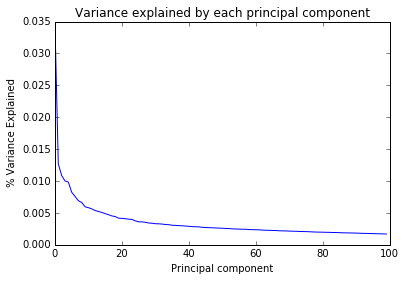

In [39]:
vect = CountVectorizer(stop_words='english')
pca = decomposition.PCA(n_components=100)

all_dtm = vect.fit_transform(X).todense()
pca.fit_transform(all_dtm)

plt.plot(pca.explained_variance_ratio_)
plt.title('Variance explained by each principal component')
plt.ylabel(' % Variance Explained')
plt.xlabel('Principal component')

Note that PCA does require scaled data, but because I knew that each column was on the same unit ("words")
I did not need to preform any standardization

trying 0 principal components with a distance of: 220.886504
trying 10 principal components with a distance of: 57.006107
trying 20 principal components with a distance of: 37.993758
trying 30 principal components with a distance of: 28.101624
trying 40 principal components with a distance of: 21.989006
trying 50 principal components with a distance of: 17.685536
trying 60 principal components with a distance of: 14.358811
trying 70 principal components with a distance of: 11.752487
trying 80 principal components with a distance of: 9.630962
trying 90 principal components with a distance of: 7.930524
trying 100 principal components with a distance of: 6.584847
trying 110 principal components with a distance of: 5.428057
trying 120 principal components with a distance of: 4.475388
trying 130 principal components with a distance of: 3.656138
trying 140 principal components with a distance of: 2.982499
trying 150 principal components with a distance of: 2.410273
trying 160 principal compo

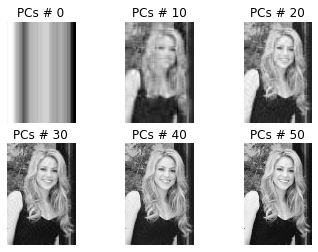

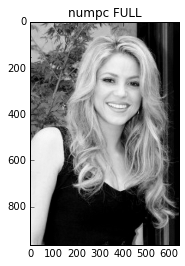

In [40]:
# BONUS SHAKIRA


from pylab import imread, imsave, subplot, imshow, title, gray, figure, show, NullLocator
from numpy import mean, cov, dot, linalg, size, argsort

def princomp(A, numpc=0):
    # computing eigenvalues and eigenvectors of covariance matrix
    M = (A-mean(A.T,axis=1)).T # subtract the mean (along columns)
    [latent,coeff] = linalg.eig(cov(M))
    p = size(coeff,axis=1)
    idx = argsort(latent) # sorting the eigenvalues
    idx = idx[::-1]       # in ascending order
    # sorting eigenvectors according to the sorted eigenvalues
    coeff = coeff[:,idx]
    latent = latent[idx] # sorting eigenvalues
    if numpc < p and numpc >= 0:
        coeff = coeff[:,range(numpc)] # cutting some PCs if needed
    score = dot(coeff.T,M) # projection of the data in the new space
    return coeff,score,latent

A = imread('../data/shakira.png') # load an image
A = mean(A,2) # to get a 2-D array
full_pc = size(A,axis=1) # numbers of all the principal components
i = 1
dist = []
for numpc in range(0,full_pc+10,10): # 0 10 20 ... full_pc
    coeff, score, latent = princomp(A,numpc)
    Ar = dot(coeff,score).T+mean(A,axis=0) # image reconstruction
    # difference in Frobenius norm
    dist.append(linalg.norm(A-Ar,'fro'))
    # showing the pics reconstructed with less than 50 PCs
    print "trying %s principal components with a distance of: %f"%(numpc,dist[-1])
    if numpc <= 50:
        if numpc == 50:
            imsave(fname= '../data/'+str(numpc)+'.png', arr = Ar)
        ax = subplot(2,3,i,frame_on=False)
        ax.xaxis.set_major_locator(NullLocator()) # remove ticks
        ax.yaxis.set_major_locator(NullLocator())
        i += 1
        imshow(Ar)
        title('PCs # '+str(numpc))
        gray()

figure()
imshow(A)
title('numpc FULL')
gray()
show()

In [ ]:
# BONUS Face recognition:

# derived from 

# http://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html

In [41]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
y = lfw_people.target
n_features = X.shape[1]

In [42]:
X.shape

(1288, 1850)

'Hugo Chavez'

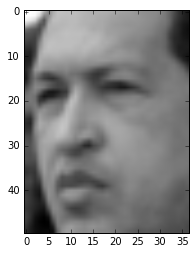

In [43]:
plt.imshow(X[0].reshape((h, w)), cmap=plt.cm.gray)
lfw_people.target_names[y[0]]

'George W Bush'

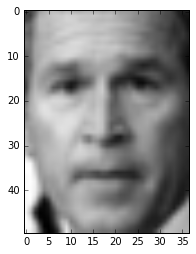

In [44]:
plt.imshow(X[100].reshape((h, w)), cmap=plt.cm.gray)
lfw_people.target_names[y[100]]

In [45]:
# the label to predict is the id of the person
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [46]:
# split into a training and testing set
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1)
# will use x_test as sample OOS data

###############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
pca = decomposition.PCA(n_components=n_components, whiten=True).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Extracting the top 150 eigenfaces from 966 faces
Projecting the input data on the eigenfaces orthonormal basis


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from time import time

t0 = time()
logreg = LogisticRegression()
print("Fitting the classifier to the training set WITHOUT PCA")
param_grid = {'C': [1e-1,1,1e1]}
clf = GridSearchCV(logreg, param_grid)
clf = clf.fit(X_train, y_train)
clf = clf.best_estimator_

print clf, "best estimator"

###############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
y_pred = clf.predict(X_test)


print accuracy_score(y_pred, y_test), "Accuracy"
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))
print (time() - t0), "seconds"

Fitting the classifier to the training set WITHOUT PCA
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) best estimator
Predicting people's names on the test set
0.810559006211 Accuracy
                   precision    recall  f1-score   support

     Ariel Sharon       0.72      0.68      0.70        19
     Colin Powell       0.83      0.71      0.76        55
  Donald Rumsfeld       0.62      0.72      0.67        25
    George W Bush       0.87      0.90      0.89       142
Gerhard Schroeder       0.79      0.84      0.81        31
      Hugo Chavez       0.87      0.81      0.84        16
       Tony Blair       0.73      0.71      0.72        34

      avg / total       0.81      0.81      0.81       322

[[ 13   1   3   1   0   0   1]
 [  2  39   2   8   0   2   2]
 [ 

/Users/georgemcintire/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [48]:
logreg = LogisticRegression()
print("Fitting the classifier to the training set")
param_grid = {'C': [1e-1,1,1e1]}
clf = GridSearchCV(logreg, param_grid)
clf = clf.fit(X_train_pca, y_train)
clf = clf.best_estimator_

print clf, "best estimator"

t0 = time()
###############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set WITH PCA")
y_pred = clf.predict(X_test_pca)

print accuracy_score(y_pred, y_test), "Accuracy"
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))
print (time() - t0), "seconds"

Fitting the classifier to the training set
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) best estimator
Predicting people's names on the test set WITH PCA
0.816770186335 Accuracy
                   precision    recall  f1-score   support

     Ariel Sharon       0.72      0.68      0.70        19
     Colin Powell       0.78      0.76      0.77        55
  Donald Rumsfeld       0.71      0.68      0.69        25
    George W Bush       0.90      0.92      0.91       142
Gerhard Schroeder       0.76      0.81      0.78        31
      Hugo Chavez       0.86      0.75      0.80        16
       Tony Blair       0.69      0.71      0.70        34

      avg / total       0.82      0.82      0.82       322

[[ 13   4   2   0   0   0   0]
 [  3  42   1   5   1   1   2]
 [  0 

In [ ]:
# Use a pipeline to make this process easier

In [49]:
from sklearn.pipeline import Pipeline
pca = decomposition.PCA(n_components=150, whiten=True)
logreg = LogisticRegression(C=1e-1)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logreg)])

In [50]:
cv = cross_val_score(pipe, X, y)

In [53]:
cv

array([ 0.8125    ,  0.83488372,  0.80516432])

In [54]:
cv = cross_val_score(logreg, X, y)

In [55]:
cv

array([ 0.82407407,  0.82790698,  0.78403756])

In [56]:
# BUT for ease:
t0 = time()
logreg.fit(X, y)
logreg.predict(X)
print (time() - t0), "Seconds"

9.88572001457 Seconds


In [57]:
t0 = time()
pipe.fit(X, y)
pipe.predict(X)
print (time() - t0), "Seconds"

0.876841068268 Seconds


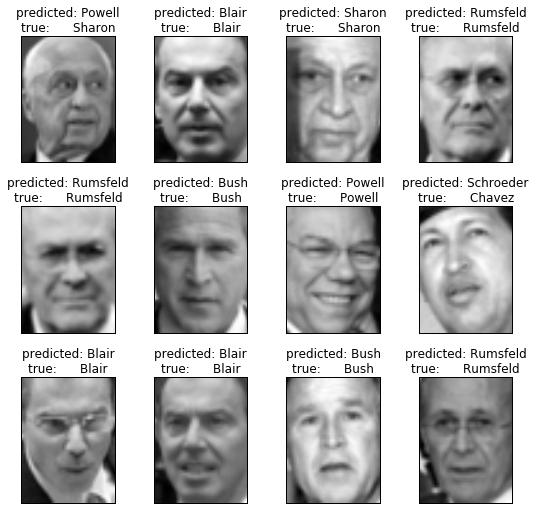

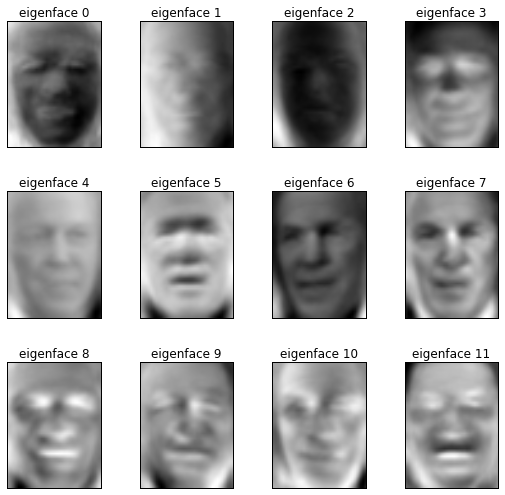

In [59]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()